In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### I/O Distribution

In [2]:
beforeBench = pd.read_csv('./max/BB.csv')
afterBench = pd.read_csv('./max/AB.csv')

preBench = pd.merge(afterBench, beforeBench, on='lpn', suffixes=('After', 'Before'))
preBench['accessCount'] = preBench['accessCountAfter'] - preBench['accessCountBefore']
preBench = preBench.loc[preBench['accessCount'] > 0]

preBench = preBench.drop(columns=['accessCountAfter', 'accessCountBefore'])
preBench.to_csv('./max/AC.csv', index=False)

bench = pd.read_csv('./max/AC.csv')

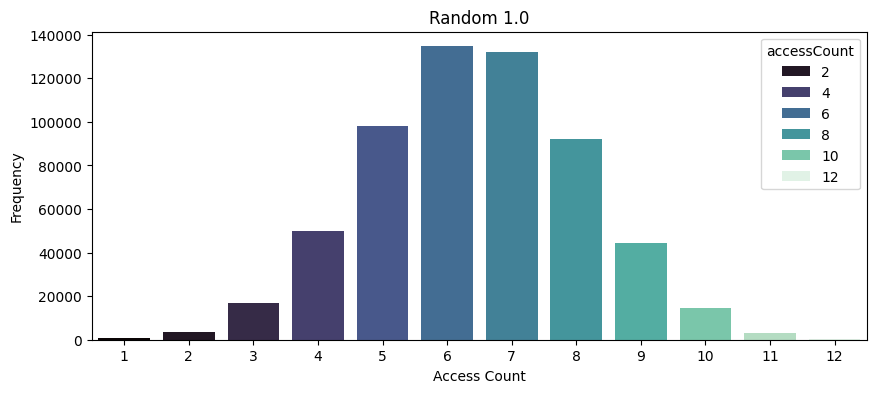

In [3]:
plt.figure(figsize=(10, 4))

plt.title('Random 1.0')
plt.xlabel('Access Count')
plt.ylabel('Frequency')

sns.countplot(x='accessCount', data=bench, hue='accessCount', palette='mako')

plt.show()

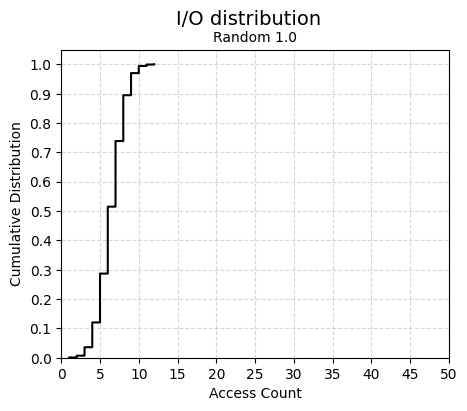

In [4]:
plt.figure(figsize=(5, 4))

plt.suptitle('I/O distribution', fontsize=14)
plt.title('Random 1.0', fontsize=10)
plt.xlabel('Access Count')
plt.ylabel('Cumulative Distribution')

plt.xlim(min(bench['accessCount']), 50)
plt.ylim(0.0, 1.05)
plt.xticks(range(min(bench['accessCount'] - 1), 55, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', alpha=0.5)

sns.ecdfplot(bench['accessCount'], color ='black')
plt.savefig("AC.png")

plt.show()

### IOPS

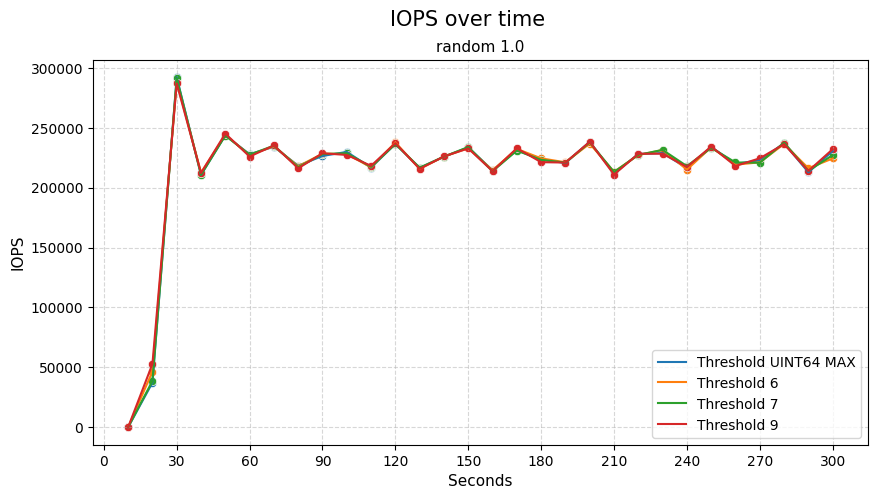

Threshold UINT64 MAX : 213997.30000
Threshold 6 : 214139.10000
Threshold 7 : 214044.83333
Threshold 9 : 214392.86667


In [5]:
IOPSMAX = pd.read_csv('./max/IOPS.csv')
IOPSMAX['time'] = range(1, len(IOPSMAX) + 1, 1)
IOPSMAX['time'] = 10 * IOPSMAX['time']

IOPS6 = pd.read_csv('./6/IOPS.csv')
IOPS6['time'] = range(1, len(IOPS6) + 1, 1)
IOPS6['time'] = 10 * IOPS6['time']

IOPS7 = pd.read_csv('./7/IOPS.csv')
IOPS7['time'] = range(1, len(IOPS7) + 1, 1)
IOPS7['time'] = 10 * IOPS7['time']

IOPS9 = pd.read_csv('./9/IOPS.csv')
IOPS9['time'] = range(1, len(IOPS9) + 1, 1)
IOPS9['time'] = 10 * IOPS9['time']

plt.figure(figsize=(10, 5))
plt.suptitle('IOPS over time', fontsize=15)
plt.title('random 1.0', fontsize=11)
plt.xlabel('Seconds', fontsize=11)
plt.ylabel('IOPS', fontsize=11)

plt.xticks(np.arange(0, 350, 30))
plt.grid(True, linestyle='--', alpha=0.5)

sns.lineplot(x='time', y='iops', data=IOPSMAX, label='Threshold UINT64 MAX')
sns.scatterplot(x="time", y="iops", data=IOPSMAX)

sns.lineplot(x='time', y='iops', data=IOPS6, label='Threshold 6')
sns.scatterplot(x="time", y="iops", data=IOPS6)

sns.lineplot(x='time', y='iops', data=IOPS7, label='Threshold 7')
sns.scatterplot(x="time", y="iops", data=IOPS7)

sns.lineplot(x='time', y='iops', data=IOPS9, label='Threshold 9')
sns.scatterplot(x="time", y="iops", data=IOPS9)

plt.savefig("IOPS.png")
plt.legend()
plt.show()

print(f"Threshold UINT64 MAX : {IOPSMAX['iops'].mean():.5f}")
print(f"Threshold 6 : {IOPS6['iops'].mean():.5f}")
print(f"Threshold 7 : {IOPS7['iops'].mean():.5f}")
print(f"Threshold 9 : {IOPS9['iops'].mean():.5f}")

### WAF

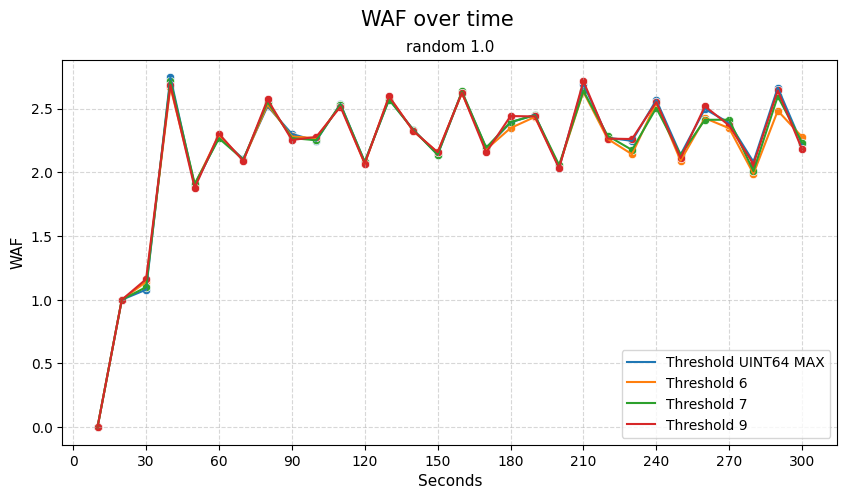

Threshold UINT64 MAX : 2.17674
Threshold 6 : 2.15575
Threshold 7 : 2.16521
Threshold 9 : 2.17502


In [6]:
WAFMAX = pd.read_csv('./max/WAF.csv')
WAFMAX['time'] = range(1, len(WAFMAX) + 1, 1)
WAFMAX['time'] = 10 * WAFMAX['time']

WAF6 = pd.read_csv('./6/WAF.csv')
WAF6['time'] = range(1, len(WAF6) + 1, 1)
WAF6['time'] = 10 * WAF6['time']

WAF7 = pd.read_csv('./7/WAF.csv')
WAF7['time'] = range(1, len(WAF7) + 1, 1)
WAF7['time'] = 10 * WAF7['time']

WAF9 = pd.read_csv('./9/WAF.csv')
WAF9['time'] = range(1, len(WAF9) + 1, 1)
WAF9['time'] = 10 * WAF9['time']

plt.figure(figsize=(10, 5))
plt.suptitle('WAF over time', fontsize=15)
plt.title('random 1.0', fontsize=11)
plt.xlabel('Seconds', fontsize=11)
plt.ylabel('WAF', fontsize=11)

plt.xticks(np.arange(0, 350, 30))
plt.grid(True, linestyle='--', alpha=0.5)

sns.lineplot(x='time', y='WAF', data=WAFMAX, label='Threshold UINT64 MAX')
sns.scatterplot(x="time", y="WAF", data=WAFMAX)

sns.lineplot(x='time', y='WAF', data=WAF6, label='Threshold 6')
sns.scatterplot(x="time", y="WAF", data=WAF6)

sns.lineplot(x='time', y='WAF', data=WAF7, label='Threshold 7')
sns.scatterplot(x="time", y="WAF", data=WAF7)

sns.lineplot(x='time', y='WAF', data=WAF9, label='Threshold 9')
sns.scatterplot(x="time", y="WAF", data=WAF9)

plt.savefig("WAF.png")
plt.legend()
plt.show()

print(f"Threshold UINT64 MAX : {WAFMAX['WAF'].mean():.5f}")
print(f"Threshold 6 : {WAF6['WAF'].mean():.5f}")
print(f"Threshold 7 : {WAF7['WAF'].mean():.5f}")
print(f"Threshold 9 : {WAF9['WAF'].mean():.5f}")